In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
master = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\MASTER_VARIABLES.csv')
risk_score = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\risk_score_final_dist_test.csv')
risk_score.columns

C:\Users\saura\AppData\Local\Temp\ipykernel_29212\4256068185.py:2: DtypeWarning: Columns (28,29,30,31,32,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  risk_score = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\risk_score_final_dist_test.csv')


Index(['object-id', 'district', 'rc-area', 'timeperiod',
       'total-tender-awarded-value', 'sopd-tenders-awarded-value',
       'sdrf-sanctions-awarded-value', 'sdrf-tenders-awarded-value',
       'ridf-tenders-awarded-value', 'ltif-tenders-awarded-value',
       'cidf-tenders-awarded-value',
       'restoration-measures-tenders-awarded-value',
       'immediate-measures-tenders-awarded-value',
       'others-tenders-awarded-value', 'total-animal-washed-away',
       'total-animal-affected', 'population-affected-total', 'crop-area',
       'total-house-fully-damaged', 'embankments-affected', 'roads', 'bridge',
       'embankment-breached', 'unnamed:-0-x', 'max-rain', 'mean-rain',
       'sum-rain', 'mean-ndvi', 'revenue-ci-x', 'district-3-x', 'district-1',
       'revenue-cr', 'hq', 'area', 'are-new', 'mean-ndbi', 'count',
       'inundation-pct', 'inundation-intensity-mean',
       'inundation-intensity-mean-nonzero', 'inundation-intensity-sum',
       'riverlevel-mean', 'riverleve

In [65]:
landd__risk = ["total-animal-affected","population-affected-total",
                "crop-area","total-house-fully-damaged","embankments-affected",
                 "roads","bridge"]

risk_score['month'] = risk_score['timeperiod'].str.split('_').str[1]
monsoon_months = ['06','07','08']
monsoon_landd = risk_score.loc[risk_score['month'].isin(monsoon_months)]
monsoon_landd = monsoon_landd.loc[~risk_score['rc-area'].isna()]

scaler = MinMaxScaler()
# Fit scaler to the data and transform it
monsoon_landd[landd__risk] = scaler.fit_transform(monsoon_landd[landd__risk])

monsoon_landd['landd'] = monsoon_landd[landd__risk].sum(axis=1)

monsoon_landd_nonzero = monsoon_landd.loc[monsoon_landd['landd']!= 0]

data = monsoon_landd_nonzero#['landd']
data

,object-id,district,rc-area,timeperiod,total-tender-awarded-value,sopd-tenders-awarded-value,sdrf-sanctions-awarded-value,sdrf-tenders-awarded-value,ridf-tenders-awarded-value,ltif-tenders-awarded-value,...,drainage-density,exposure,flood-hazard,government-response,vulnerability,efficiency,topsis-score,risk-score,month,landd
363,121,BARPETA,513.0,2021_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000640,3,2.0,5,5,0.834827,0.613958,5,06,0.006667
367,266,BARPETA,318.0,2021_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000613,2,2.0,5,5,0.841075,0.584383,4,06,0.038462
368,200,BONGAIGAON,348.0,2021_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000611,2,2.0,5,5,0.834087,0.584383,4,06,0.157302
370,249,BISWANATH,1042.0,2021_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000561,3,2.0,5,4,0.879052,0.579406,4,06,0.007601
372,143,LAKHIMPUR,330.0,2021_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000581,1,2.0,5,5,0.840366,0.555118,4,06,0.052808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,174,GOLAGHAT,323.0,2024_08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000616,1,1.0,5,1,1.000000,0.214581,1,08,0.002151
7368,171,JORHAT,437.0,2024_08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000469,1,1.0,5,1,0.994560,0.214581,1,08,0.000177
7374,237,DARRANG,53.0,2024_08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000690,1,1.0,5,1,1.000000,0.214581,1,08,0.000056
7375,242,UDALGURI,2.0,2024_08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000719,1,1.0,5,1,1.000000,0.214581,1,08,0.000071


In [63]:
corr = monsoon_landd_nonzero['landd'].corr(monsoon_landd_nonzero['efficiency'])
corr

0.0075658092163305105

In [64]:
hi_dmg = monsoon_landd_nonzero.loc[monsoon_landd_nonzero['landd'] >= 0.8]
hi_dmg = hi_dmg.sort_values('vulnerability', ascending=False)
hi_dmg

,object-id,district,rc-area,timeperiod,total-tender-awarded-value,sopd-tenders-awarded-value,sdrf-sanctions-awarded-value,sdrf-tenders-awarded-value,ridf-tenders-awarded-value,ltif-tenders-awarded-value,...,drainage-density,exposure,flood-hazard,government-response,vulnerability,efficiency,topsis-score,risk-score,month,landd
2520,271,MORIGAON,486.0,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000560,2,3.0,5,5,0.876491,0.782037,5,06,0.884015
2523,270,DARRANG,649.0,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000707,5,2.0,5,5,0.873590,0.670372,5,06,0.975792
2525,121,BARPETA,513.0,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000640,3,2.0,5,5,0.878067,0.628338,4,06,3.041354
2528,266,BARPETA,318.0,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000613,2,2.0,5,5,0.851105,0.598696,4,06,1.178859
2522,136,NAGAON,375.0,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000599,2,3.0,5,4,0.896655,0.752586,5,06,2.289268
2526,185,CACHAR,838.0,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000509,5,2.0,4,4,0.916088,0.624072,4,06,1.080839
2740,128,MORIGAON,390.0,2022_07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000535,2,2.0,1,4,0.900158,0.493759,3,07,1.019815
2556,128,MORIGAON,390.0,2022_06,62255000.0,0.0,0.0,0.0,62255000.0,0.0,...,0.000535,2,2.0,1,4,0.899636,0.495442,4,06,1.003559
2703,135,NAGAON,341.0,2022_07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000571,1,3.0,5,4,0.911926,0.709795,4,07,1.156945
2702,193,KARIMGANJ,575.0,2022_07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000442,2,3.0,5,4,0.881918,0.758791,5,07,0.881748


## Data export for DEA model

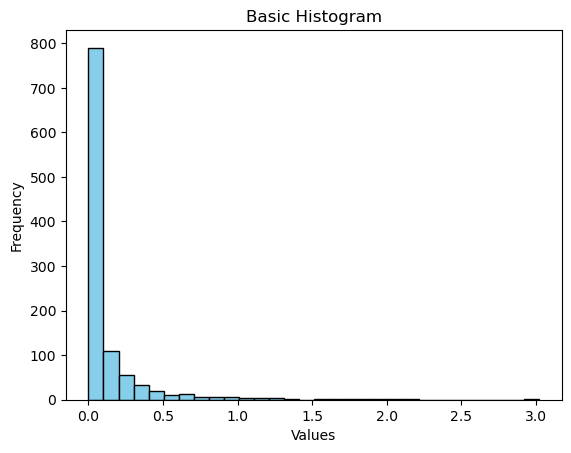

In [16]:
landd = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]

scaler = MinMaxScaler()
# Fit scaler to the data and transform it
master[landd] = scaler.fit_transform(master[landd])

master['landd'] = master[landd].sum(axis=1)
master['month'] = master['timeperiod'].str.split('_').str[1]

monsoon_months = ['06','07','08']
monsoon_landd = master.loc[master['month'].isin(monsoon_months)]
monsoon_landd_nonzero = monsoon_landd.loc[monsoon_landd['landd']!= 0]

data = monsoon_landd_nonzero['landd']
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()


In [17]:
monsoon_landd_nonzero

,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_sanctions_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,...,net_sown_area_in_hac,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density,landd,month
3,101,KOKRAJHAR,1069,2021_07,0.0,0.0,0.0,0.0,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.006667,07
14,101,KOKRAJHAR,1069,2022_06,0.0,0.0,0.0,0.0,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.458925,06
15,101,KOKRAJHAR,1069,2022_07,0.0,0.0,0.0,0.0,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.033333,07
26,101,KOKRAJHAR,1069,2023_06,0.0,0.0,0.0,0.0,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.065591,06
27,101,KOKRAJHAR,1069,2023_07,55876180.0,0.0,0.0,55876180.0,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.006667,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,281,MAJULI,648,2023_06,0.0,0.0,0.0,0.0,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,0.013383,06
7545,281,MAJULI,648,2023_07,0.0,0.0,0.0,0.0,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,0.046066,07
7546,281,MAJULI,648,2023_08,0.0,0.0,0.0,0.0,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,0.139960,08
7556,281,MAJULI,648,2024_06,0.0,0.0,0.0,0.0,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,0.009417,06


### Playing with vulnerability script

In [2]:
import numpy as np
import DEA
import pandas as pd
import os
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import jenkspy

In [4]:
master_variables = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\MASTER_VARIABLES.csv')
master_variables_copy = master_variables.copy()

# Per capita variables
master_variables['Population_affected_Total'] = master_variables['Population_affected_Total']/master_variables['sum_population']
master_variables['Total_Animal_Affected'] = master_variables['Total_Animal_Affected']/master_variables['sum_population']

master_variables['Total_House_Fully_Damaged'] = master_variables['Total_House_Fully_Damaged']/master_variables['sum_population']
master_variables['Crop_Area'] = master_variables['Crop_Area']/master_variables['net_sown_area_in_hac']
master_variables['Roads'] = master_variables['Roads']/master_variables['rc_area']
master_variables['Bridge'] = master_variables['Bridge']/master_variables['rc_area']
master_variables['Embankment breached'] = master_variables['Embankment breached']/master_variables['rc_area']


master_variables['sum_aged_population'] = master_variables['sum_aged_population']/master_variables['rc_area']
master_variables['rail_length'] = master_variables['rail_length']/master_variables['rc_area']
master_variables['schools_count'] = master_variables['schools_count']/master_variables['rc_area']
master_variables['health_centres_count'] = master_variables['health_centres_count']/master_variables['rc_area']
master_variables['road_length'] = master_variables['road_length']/master_variables['rc_area']
master_variables['net_sown_area_in_hac'] = master_variables['net_sown_area_in_hac']/master_variables['rc_area']
master_variables['Embankments affected'] = master_variables['Embankments affected']/master_variables['rc_area']

#INPUT VARS
vulnerability_vars = ["mean_sexratio",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_piped_hhds_pct",
                      
                      "rc_nosanitation_hhds_pct",
                      "sum_aged_population",
                      "Embankment breached",
                     ]

#OUTPUT VARS
damage_vars = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]

vulnerability_df = master_variables[vulnerability_vars + damage_vars + ['timeperiod', 'object_id']]


#### Original code

In [23]:

'''# Function to assign bins based on breaks
def assign_bin(value):
    for i in range(len(breaks)):
        if value <= breaks[i]:
            return i + 1  # Since bins start from 1
    return len(breaks)  # If value is greater than the last break
'''
vulnerability_df_months = []
for month in tqdm(vulnerability_df.timeperiod.unique()):
    vulnerability_df_month = vulnerability_df[vulnerability_df.timeperiod == month]
    vulnerability_df_month = vulnerability_df_month.set_index('object_id')
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
    vulnerability_df_month[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_df_month[vulnerability_vars + damage_vars])

    # Reversing a few input vars (as more input should be more vulnerability)
    vulnerability_df_month['schools_count'] = 1 - vulnerability_df_month['schools_count']
    vulnerability_df_month['health_centres_count'] = 1 - vulnerability_df_month['health_centres_count']
    vulnerability_df_month['rail_length'] = 1 - vulnerability_df_month['rail_length']
    vulnerability_df_month['road_length'] = 1 - vulnerability_df_month['road_length']
    vulnerability_df_month['avg_electricity'] = 1 - vulnerability_df_month['avg_electricity']
    vulnerability_df_month['rc_piped_hhds_pct'] = 1 - vulnerability_df_month['rc_piped_hhds_pct']
    
    # Reversing all output vars (as more output should be less damage)
    vulnerability_df_month[damage_vars] = 1 - vulnerability_df_month[damage_vars]

    # Input dict
    X = vulnerability_df_month[vulnerability_vars].T.to_dict('list')

    # Output dict
    y = vulnerability_df_month[damage_vars].T.to_dict('list')

    DMU = list(vulnerability_df_month.index.astype(int))

    df = DEA.CRS(DMU, X, y, orientation="input", dual=False)


    vulnerability_df_month = vulnerability_df_month.reset_index().merge(df,
                                                          left_on = 'object_id',
                                                          right_on = 'DMU')
    #print(vulnerability_df_month)

    # Perform Natural Jenks classification with 5 classes
    breaks = jenkspy.jenks_breaks(vulnerability_df_month['efficiency'], n_classes=5)

    print(breaks)

    # Add a new column with the assigned bins
    vulnerability_df_month['vulnerability'] = pd.cut(vulnerability_df_month['efficiency'],
                                                     bins=breaks,
                                                     labels=[5, 4, 3, 2, 1], #Low efficiency = More Vulnerability
                                                     include_lowest=True)
    
    vulnerability_df_months.append(vulnerability_df_month)


  2%|▏         | 1/42 [00:00<00:36,  1.14it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

  5%|▍         | 2/42 [00:01<00:37,  1.08it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

  7%|▋         | 3/42 [00:02<00:35,  1.08it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 10%|▉         | 4/42 [00:03<00:34,  1.09it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 12%|█▏        | 5/42 [00:04<00:33,  1.10it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 14%|█▍        | 6/42 [00:05<00:32,  1.10it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 17%|█▋        | 7/42 [00:06<00:32,  1.08it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 19%|█▉        | 8/42 [00:07<00:31,  1.08it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 21%|██▏       | 9/42 [00:08<00:31,  1.06it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.683028             0.048974       0.871690   
1          102       0.685572             0.055696       0.552956   
2          103       0.685994             0.107503       0.670846   
3          104       0.684518             0.052473       0.868337   
4          105       0.576978             0.060072       0.841098   
..         ...            ...                  ...            ...   
175        277       0.741948             0.154170       0.663220   
176        278       0.556007             0.058206       0.828484   
177        279       0.532107             0.095834       0.834578   
178        280       0.742075             0.034326       0.759470   
179        281       0.741363             0.029006       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 24%|██▍       | 10/42 [00:09<00:30,  1.04it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 26%|██▌       | 11/42 [00:10<00:29,  1.04it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 29%|██▊       | 12/42 [00:11<00:30,  1.01s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 31%|███       | 13/42 [00:13<00:34,  1.20s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 33%|███▎      | 14/42 [00:14<00:37,  1.33s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 36%|███▌      | 15/42 [00:16<00:38,  1.42s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 38%|███▊      | 16/42 [00:17<00:38,  1.49s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 40%|████      | 17/42 [00:19<00:38,  1.55s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 43%|████▎     | 18/42 [00:21<00:38,  1.59s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 45%|████▌     | 19/42 [00:22<00:36,  1.61s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 48%|████▊     | 20/42 [00:24<00:36,  1.67s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 50%|█████     | 21/42 [00:26<00:35,  1.71s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.685977             0.048914       0.871690   
1          102       0.688561             0.055505       0.552956   
2          103       0.688973             0.106969       0.670846   
3          104       0.687555             0.052501       0.868337   
4          105       0.582588             0.060095       0.841098   
..         ...            ...                  ...            ...   
175        277       0.740096             0.153560       0.663220   
176        278       0.554858             0.058449       0.828484   
177        279       0.531215             0.095323       0.834578   
178        280       0.740223             0.033815       0.759470   
179        281       0.739510             0.028885       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 52%|█████▏    | 22/42 [00:28<00:34,  1.74s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 55%|█████▍    | 23/42 [00:30<00:33,  1.76s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 57%|█████▋    | 24/42 [00:32<00:32,  1.80s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 60%|█████▉    | 25/42 [00:33<00:30,  1.80s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 62%|██████▏   | 26/42 [00:35<00:29,  1.82s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 64%|██████▍   | 27/42 [00:37<00:27,  1.83s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 67%|██████▋   | 28/42 [00:39<00:25,  1.82s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 69%|██████▉   | 29/42 [00:41<00:24,  1.86s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 71%|███████▏  | 30/42 [00:42<00:19,  1.62s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 74%|███████▍  | 31/42 [00:43<00:15,  1.42s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 76%|███████▌  | 32/42 [00:44<00:12,  1.27s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 79%|███████▊  | 33/42 [00:45<00:10,  1.16s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.688857             0.048858       0.871690   
1          102       0.691479             0.055325       0.552956   
2          103       0.691882             0.106467       0.670846   
3          104       0.690522             0.052527       0.868337   
4          105       0.588066             0.060118       0.841098   
..         ...            ...                  ...            ...   
175        277       0.738287             0.152986       0.663220   
176        278       0.553735             0.058678       0.828484   
177        279       0.530344             0.094842       0.834578   
178        280       0.738415             0.033334       0.759470   
179        281       0.737699             0.028772       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 81%|████████  | 34/42 [00:46<00:08,  1.08s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 83%|████████▎ | 35/42 [00:47<00:07,  1.04s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 86%|████████▌ | 36/42 [00:47<00:05,  1.00it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 88%|████████▊ | 37/42 [00:48<00:04,  1.03it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 90%|█████████ | 38/42 [00:49<00:03,  1.05it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 93%|█████████▎| 39/42 [00:50<00:02,  1.06it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

 95%|█████████▌| 40/42 [00:51<00:01,  1.07it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108             0.000000   
1                0.

 98%|█████████▊| 41/42 [00:52<00:00,  1.06it/s]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

100%|██████████| 42/42 [00:53<00:00,  1.27s/it]

     object_id  mean_sexratio  sum_aged_population  schools_count  \
0          101       0.691670             0.048806       0.871690   
1          102       0.694330             0.055155       0.552956   
2          103       0.694724             0.105993       0.670846   
3          104       0.693419             0.052551       0.868337   
4          105       0.593416             0.060139       0.841098   
..         ...            ...                  ...            ...   
175        277       0.736520             0.152445       0.663220   
176        278       0.552639             0.058894       0.828484   
177        279       0.529493             0.094389       0.834578   
178        280       0.736649             0.032881       0.759470   
179        281       0.735931             0.028665       0.885174   

     health_centres_count  rail_length  road_length  Embankment breached  \
0                0.909318     0.822365     0.932108                  0.0   
1                0.

#### Weightage post DEA - to efficiency scores

In [22]:
# Function to assign bins based on breaks
def assign_bin(value):
    for i in range(len(breaks)):
        if value <= breaks[i]:
            return i + 1  # Since bins start from 1
    return len(breaks)  # If value is greater than the last break

vulnerability_df_months = []
for month in tqdm(vulnerability_df.timeperiod.unique()):
    vulnerability_df_month = vulnerability_df[vulnerability_df.timeperiod == month]
    vulnerability_df_month = vulnerability_df_month.set_index('object_id')
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
    vulnerability_df_month[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_df_month[vulnerability_vars + damage_vars])

    # Reversing a few input vars (as more input should be more vulnerability)
    vulnerability_df_month['schools_count'] = 1 - vulnerability_df_month['schools_count']
    vulnerability_df_month['health_centres_count'] = 1 - vulnerability_df_month['health_centres_count']
    vulnerability_df_month['rail_length'] = 1 - vulnerability_df_month['rail_length']
    vulnerability_df_month['road_length'] = 1 - vulnerability_df_month['road_length']
    vulnerability_df_month['avg_electricity'] = 1 - vulnerability_df_month['avg_electricity']
    vulnerability_df_month['rc_piped_hhds_pct'] = 1 - vulnerability_df_month['rc_piped_hhds_pct']
    
    # Reversing all output vars (as more output should be less damage)
    vulnerability_df_month[damage_vars] = 1 - vulnerability_df_month[damage_vars]

    # Input dict
    X = vulnerability_df_month[vulnerability_vars].T.to_dict('list')

    # Output dict
    y = vulnerability_df_month[damage_vars].T.to_dict('list')

    DMU = list(vulnerability_df_month.index.astype(int))

    df = DEA.CRS(DMU, X, y, orientation="input", dual=False)


    vulnerability_df_month = vulnerability_df_month.reset_index().merge(df,
                                                          left_on = 'object_id',
                                                          right_on = 'DMU')
    
    # Calculate composite score for damage variables (weighted mean of damage variables)
    vulnerability_df_month['composite_damage'] = vulnerability_df_month[damage_vars].sum(axis=1) +1
    
    # Multiply efficiency score by composite damage score to give more weight to damage variables
    vulnerability_df_month['weighted_efficiency'] = vulnerability_df_month['efficiency'] * vulnerability_df_month['composite_damage']
    
    # Perform Natural Jenks classification with 5 classes on weighted efficiency
    breaks = jenkspy.jenks_breaks(vulnerability_df_month['weighted_efficiency'], n_classes=5)
    print(breaks)


    # Add a new column with the assigned bins
    vulnerability_df_month['vulnerability'] = pd.cut(vulnerability_df_month['weighted_efficiency'],
                                                     bins=breaks,
                                                     labels=[5, 4, 3, 2, 1],  # Low efficiency = More Vulnerability
                                                     include_lowest=True
                                                     )
    '''
    # Perform Natural Jenks classification with 5 classes
    breaks = jenkspy.jenks_breaks(vulnerability_df_month['efficiency'], n_classes=5)


    # Add a new column with the assigned bins
    vulnerability_df_month['vulnerability'] = pd.cut(vulnerability_df_month['efficiency'],
                                                     bins=breaks,
                                                     labels=[5, 4, 3, 2, 1], #Low efficiency = More Vulnerability
                                                     include_lowest=True)
    '''
    vulnerability_df_months.append(vulnerability_df_month)


  2%|▏         | 1/42 [00:00<00:36,  1.14it/s]

[6.3918719156829535, 6.816381126605576, 7.096212631395935, 7.415837014429482, 7.790523877605407, 8.000000000000002]


  5%|▍         | 2/42 [00:01<00:35,  1.12it/s]

[5.885857014610809, 6.608651616932844, 6.999999999999998, 7.407327967176421, 7.790523877605407, 8.000000000000002]


  7%|▋         | 3/42 [00:02<00:35,  1.10it/s]

[5.413291730178395, 5.997352395181447, 6.847114840425413, 7.308740436715905, 7.766251090030688, 8.000000000000002]


 10%|▉         | 4/42 [00:03<00:34,  1.10it/s]

[4.935969566702389, 6.066294420318397, 6.91839859897746, 7.407327967176421, 7.799699576090283, 8.000000000000002]


 12%|█▏        | 5/42 [00:04<00:33,  1.11it/s]

[4.703073511893425, 5.02608932563345, 6.440598517503841, 7.0016308396698435, 7.562953260541987, 8.000000000000002]


 14%|█▍        | 6/42 [00:05<00:32,  1.12it/s]

[5.132804555121781, 5.609730674632378, 6.696664705973527, 7.135027014842355, 7.633738128190512, 8.000000000000002]


 17%|█▋        | 7/42 [00:06<00:31,  1.11it/s]

[6.25963929539334, 6.608651616932844, 6.979994556841186, 7.363215156823099, 7.790523877605407, 8.000000000000002]


 19%|█▉        | 8/42 [00:07<00:31,  1.09it/s]

[6.3918719156829535, 6.816381126605576, 7.096212631395935, 7.415837014429482, 7.790523877605407, 8.000000000000002]


 21%|██▏       | 9/42 [00:08<00:30,  1.09it/s]

[6.3918719156829535, 6.816381126605576, 7.096212631395935, 7.415837014429482, 7.790523877605407, 8.000000000000002]


 24%|██▍       | 10/42 [00:09<00:29,  1.09it/s]

[6.390117894976144, 6.864147345021154, 7.22578266226164, 7.530759403316317, 7.811165326185852, 8.000000000000002]


 26%|██▌       | 11/42 [00:10<00:28,  1.09it/s]

[6.390117894976144, 6.864147345021154, 7.22578266226164, 7.530759403316317, 7.811165326185852, 8.000000000000002]


 29%|██▊       | 12/42 [00:10<00:27,  1.09it/s]

[6.390117894976144, 6.864147345021154, 7.22578266226164, 7.530759403316317, 7.811165326185852, 8.000000000000002]


 31%|███       | 13/42 [00:11<00:26,  1.08it/s]

[5.844404369506783, 6.540425433627073, 6.996077562270432, 7.368125549179286, 7.771428571428571, 8.000000000000002]


 33%|███▎      | 14/42 [00:12<00:25,  1.09it/s]

[4.149061912833166, 5.655415041431459, 6.685556402292706, 7.188794658123777, 7.667444817559494, 8.000000000000002]


 36%|███▌      | 15/42 [00:13<00:24,  1.09it/s]

[4.5766251650543675, 5.203960263135758, 6.549858403600768, 7.156386421687605, 7.6602431194207155, 8.000000000000002]


 38%|███▊      | 16/42 [00:14<00:23,  1.09it/s]

[4.868887133075982, 5.23434921674413, 6.390711967149444, 7.230660088584341, 7.716601954005479, 8.0]


 40%|████      | 17/42 [00:15<00:22,  1.10it/s]

[4.161063139213134, 5.259335196289755, 6.941888481407218, 7.371235041048826, 7.8000194945059285, 8.000000000000002]


 43%|████▎     | 18/42 [00:16<00:21,  1.09it/s]

[5.293872546102188, 5.762881448189499, 6.846487151298857, 7.326432816828316, 7.766382290524528, 8.000000000000002]


 45%|████▌     | 19/42 [00:17<00:21,  1.09it/s]

[4.597527146161224, 6.13421156339287, 6.864639766979908, 7.310042714574184, 7.766382290524528, 8.000000000000002]


 48%|████▊     | 20/42 [00:18<00:20,  1.10it/s]

[6.390117894976144, 6.864147345021154, 7.22578266226164, 7.530759403316317, 7.811165326185852, 8.000000000000002]


 50%|█████     | 21/42 [00:19<00:19,  1.10it/s]

[6.390117894976144, 6.864147345021154, 7.22578266226164, 7.530759403316317, 7.811165326185852, 8.000000000000002]


 52%|█████▏    | 22/42 [00:20<00:18,  1.11it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000002]


 55%|█████▍    | 23/42 [00:20<00:17,  1.11it/s]

[6.2462518412291015, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000004]


 57%|█████▋    | 24/42 [00:21<00:16,  1.11it/s]

[5.854360783929465, 6.53839413074661, 6.9955327171054655, 7.375560334655931, 7.789077011219306, 8.000000000000004]


 60%|█████▉    | 25/42 [00:22<00:15,  1.11it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000002]


 62%|██████▏   | 26/42 [00:23<00:14,  1.08it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000004]


 64%|██████▍   | 27/42 [00:24<00:13,  1.07it/s]

[4.615112133190038, 5.772835406815524, 6.8900301832114765, 7.36494087934795, 7.7642743592887, 8.000000000000004]


 67%|██████▋   | 28/42 [00:25<00:13,  1.08it/s]

[4.662597992888893, 4.914629922883765, 6.588928089924401, 7.099300973903311, 7.637884049152816, 8.000000000000002]


 69%|██████▉   | 29/42 [00:26<00:11,  1.09it/s]

[4.632803730586633, 5.042990415452975, 6.530653851551579, 7.161985083871093, 7.708233489259497, 8.000000000000002]


 71%|███████▏  | 30/42 [00:27<00:11,  1.07it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000002]


 74%|███████▍  | 31/42 [00:28<00:10,  1.08it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000002]


 76%|███████▌  | 32/42 [00:29<00:09,  1.08it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000002]


 79%|███████▊  | 33/42 [00:30<00:08,  1.09it/s]

[6.388526286556921, 6.857820700174894, 7.219418180268161, 7.530159044783919, 7.808073745416474, 8.000000000000002]


 81%|████████  | 34/42 [00:31<00:07,  1.08it/s]

[6.387075530896177, 6.853706518676772, 7.219193658108665, 7.531636915031083, 7.843276042682815, 8.000000000000002]


 83%|████████▎ | 35/42 [00:32<00:06,  1.08it/s]

[6.387075530896177, 6.853706518676772, 7.219193658108665, 7.531636915031083, 7.843276042682815, 8.000000000000002]


 86%|████████▌ | 36/42 [00:32<00:05,  1.08it/s]

[6.387075530896177, 6.853706518676772, 7.219193658108665, 7.531636915031083, 7.843276042682815, 8.000000000000002]


 88%|████████▊ | 37/42 [00:33<00:04,  1.06it/s]

[6.387075530896177, 6.853706518676772, 7.219193658108665, 7.531636915031083, 7.843276042682815, 8.000000000000002]


 90%|█████████ | 38/42 [00:34<00:03,  1.06it/s]

[6.387075530896177, 6.853706518676772, 7.219193658108665, 7.531636915031083, 7.843276042682815, 8.000000000000002]


 93%|█████████▎| 39/42 [00:35<00:02,  1.04it/s]

[4.499342493226252, 5.748211360312616, 6.878249488311489, 7.334567400590793, 7.749765177793174, 8.000000000000002]


 95%|█████████▌| 40/42 [00:36<00:01,  1.05it/s]

[5.5573296856232695, 6.209429686408827, 6.838889743032042, 7.232789055639472, 7.661567488084111, 8.0]


 95%|█████████▌| 40/42 [00:37<00:01,  1.06it/s]

[4.076826674498511, 4.076826674498511, 6.731285065190438, 7.298038120261475, 7.720109748503312, 8.000000000000002]


ValueError: Bin edges must be unique: Index([4.076826674498511, 4.076826674498511, 6.731285065190438,
       7.298038120261475, 7.720109748503312, 8.000000000000002],
      dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
vulnerability_df_months

In [20]:
vulnerability = pd.concat(vulnerability_df_months)
vulnerability['landd'] = vulnerability[damage_vars].sum(axis=1)

master_variables = master_variables_copy.merge(vulnerability[['timeperiod', 'object_id', 'efficiency', 'vulnerability','landd']],
                       on = ['timeperiod', 'object_id'])

master_variables#.to_csv(os.getcwd()+'/IDS-DRR-Assam/RiskScoreModel/data/factor_scores_l1_vulnerability_weighted.csv', index=False)

,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_sanctions_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,...,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density,efficiency,vulnerability,landd
0,101,KOKRAJHAR,1069,2021_04,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4,7.000000
1,101,KOKRAJHAR,1069,2021_05,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4,7.000000
2,101,KOKRAJHAR,1069,2021_06,8544502.0,8544502.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4,7.000000
3,101,KOKRAJHAR,1069,2021_07,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.907184,3,6.990061
4,101,KOKRAJHAR,1069,2021_08,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.898802,3,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,281,MAJULI,648,2024_05,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1,7.000000
7556,281,MAJULI,648,2024_06,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1,6.686211
7557,281,MAJULI,648,2024_07,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1,5.370731
7558,281,MAJULI,648,2024_08,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1,7.000000


#### Weightage pre DEA

1) landd and efficiency correlation (pearsons) : 0.10710835049028346
2) landd and efficiency correlation (pearsons) after adding weights only to negative inputs and landd: -0.11370429147480768
    low vulnerability districts: Kamrup, Kamrup metro, Nalbari, Baksa, Karimganj
    Vulnerable districts: HOJAI(4.753968)	,MORIGAON,SONITPUR,	UDALGURI,BONGAIGAON	(3.338095)


In [5]:
# Apply custom weights based on damage conditions
vulnerability_df = master_variables[vulnerability_vars + damage_vars + ['timeperiod', 'object_id',]]

scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
vulnerability_df['landd_score'] = scaler.fit_transform(vulnerability_df[damage_vars]).sum(axis=1) +1

neg_inputs = ["rc_nosanitation_hhds_pct","sum_aged_population","Embankment breached"]

def apply_custom_weights(row, threshold=0.001):
    # Custom weights multiplier for significant damage
    custom_weight = row['landd_score']  # Adjust this value as needed

    # Check if any damage variable exceeds the threshold
    if any(row[damage_vars] > threshold):
        # Apply custom weights to the outputs (damage vars)
        row[damage_vars + neg_inputs] *= custom_weight

    return row



def assign_bin(value, breaks):
    for i in range(len(breaks)):
        if value <= breaks[i]:
            return i + 1  # Since bins start from 1
    return len(breaks)  # If value is greater than the last break


vulnerability_df_months = []
for month in tqdm(vulnerability_df.timeperiod.unique()):
    
    #print(vulnerability_df_month['landd_score'])
    vulnerability_df = vulnerability_df.apply(apply_custom_weights, axis=1)
    vulnerability_df_month = vulnerability_df[vulnerability_df.timeperiod == month]
    vulnerability_df_month = vulnerability_df_month.set_index('object_id')
    
    # Initialize MinMaxScaler
    #scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
    vulnerability_df_month[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_df_month[vulnerability_vars + damage_vars])

    # Reverse certain input variables (as more input means more vulnerability)
    vulnerability_df_month['schools_count'] = 1 - vulnerability_df_month['schools_count']
    vulnerability_df_month['health_centres_count'] = 1 - vulnerability_df_month['health_centres_count']
    vulnerability_df_month['rail_length'] = 1 - vulnerability_df_month['rail_length']
    vulnerability_df_month['road_length'] = 1 - vulnerability_df_month['road_length']
    vulnerability_df_month['avg_electricity'] = 1 - vulnerability_df_month['avg_electricity']
    vulnerability_df_month['rc_piped_hhds_pct'] = 1 - vulnerability_df_month['rc_piped_hhds_pct']

    # Reverse all output (damage) variables (as more output means less damage)
    vulnerability_df_month[damage_vars] = 1 - vulnerability_df_month[damage_vars]

    # Input dict
    X = vulnerability_df_month[vulnerability_vars].T.to_dict('list')

    # Output dict
    y = vulnerability_df_month[damage_vars].T.to_dict('list')

    DMU = list(vulnerability_df_month.index.astype(int))

    df = DEA.CRS(DMU, X, y, orientation="input", dual=False)

    # Merge efficiency results
    vulnerability_df_month = vulnerability_df_month.reset_index().merge(df,
                                                                        left_on='object_id',
                                                                        right_on='DMU')
    
    # Perform Natural Jenks classification with 5 classes
    breaks = jenkspy.jenks_breaks(vulnerability_df_month['efficiency'], n_classes=5)

    # Add a new column with the assigned bins
    vulnerability_df_month['vulnerability'] = pd.cut(vulnerability_df_month['efficiency'],
                                                     bins=breaks,
                                                     labels=[5, 4, 3, 2, 1],  # Low efficiency = More Vulnerability
                                                     include_lowest=True)

    vulnerability_df_months.append(vulnerability_df_month)


C:\Users\saura\AppData\Local\Temp\ipykernel_21568\2774607409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vulnerability_df['landd_score'] = scaler.fit_transform(vulnerability_df[damage_vars]).sum(axis=1) +1
  0%|          | 0/42 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2025-11-24


100%|██████████| 42/42 [01:44<00:00,  2.50s/it]


In [6]:
vulnerability = pd.concat(vulnerability_df_months)
#ulnerability['landd'] = vulnerability[damage_vars].sum(axis=1)

master_variables = master_variables_copy.merge(vulnerability[['timeperiod', 'object_id', 'efficiency', 'vulnerability','landd_score']],
                       on = ['timeperiod', 'object_id'])

master_variables#.to_csv(os.getcwd()+'/IDS-DRR-Assam/RiskScoreModel/data/factor_scores_l1_vulnerability_weighted.csv', index=False)

,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_sanctions_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,...,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density,efficiency,vulnerability,landd_score
0,101,KOKRAJHAR,1069,2021_04,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4,1.000000
1,101,KOKRAJHAR,1069,2021_05,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4,1.000000
2,101,KOKRAJHAR,1069,2021_06,8544502.0,8544502.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4,1.000000
3,101,KOKRAJHAR,1069,2021_07,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.904900,3,1.001181
4,101,KOKRAJHAR,1069,2021_08,0.0,0.0,0.0,0.0,0.0,0.0,...,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.890378,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,281,MAJULI,648,2024_05,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1,1.000000
7556,281,MAJULI,648,2024_06,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,0.934769,2,1.017356
7557,281,MAJULI,648,2024_07,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,0.766629,4,1.208591
7558,281,MAJULI,648,2024_08,0.0,0.0,0.0,0.0,0.0,0.0,...,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1,1.000000


In [7]:
corr = master_variables['landd_score'].corr(master_variables['efficiency'])
corr

-0.11370429147480768

In [17]:
master_variables['vulnerability'] = master_variables['vulnerability'].astype(int)
hi_vul = master_variables.groupby('district')['vulnerability'].mean().reset_index()
hi_vul.sort_values('vulnerability', ascending = False)

,district,vulnerability
16,HOJAI,4.753968
25,MORIGAON,4.528571
29,SONITPUR,3.601190
33,UDALGURI,3.544974
4,BONGAIGAON,3.338095
2,BARPETA,3.297619
23,LAKHIMPUR,3.258503
1,BAKSA,3.173469
3,BISWANATH,3.166667
5,CACHAR,3.104762
